In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import glob

In [2]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [3]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [4]:
df = df.groupby('Country/Region').sum()

In [5]:
df = df.T

In [6]:
df = df.drop('Lat')
df = df.drop('Long')

In [7]:
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Tunisia', 'Turkey', 'US', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Venezuela', 'Vietnam',
       'occupied Palestinian territory'],
      dtype='object', name='Country/Region', length=142)

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df.index.name = 'Date'

In [10]:
today = df.iloc[-1]

In [11]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'Greece',
       'Iceland', 'India', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Kuwait',
       'Malaysia', 'Netherlands', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Saudi Arabia', 'Singapore', 'Slovenia', 'Sweden'],
      dtype='object', name='Country/Region')
Index(['France', 'Germany', 'Korea, South', 'Norway', 'Spain', 'Switzerland',
       'US', 'United Kingdom'],
      dtype='object', name='Country/Region')
Index(['China', 'Iran', 'Italy'], dtype='object', name='Country/Region')


In [12]:
condition = today[(today >= 1000) & (today < 10000)].index
print(condition)

Index(['France', 'Germany', 'Korea, South', 'Norway', 'Spain', 'Switzerland',
       'US', 'United Kingdom'],
      dtype='object', name='Country/Region')


In [13]:
min_case_num = 100
title_name = "countries with cases >1k & <10k"

In [14]:
data = {}
data_original = {}

for c in condition:
    country = df[c]
    countrt100 = country[country >= min_case_num]
    
    countrt100 = countrt100.reset_index()
    countrt100 = countrt100[c]
    
    data[c] = countrt100
    data_original[c] = df[c]

Text(0.5, 0, 'Days after passing 100 confirmed cases')

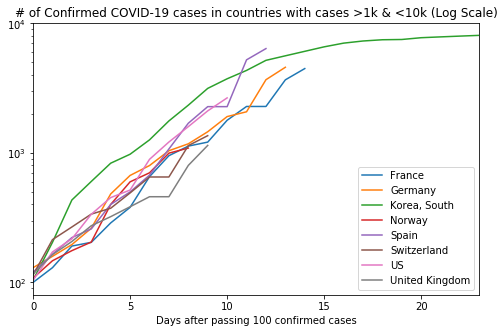

In [15]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for c in data.keys():
    data[c].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after passing 100 confirmed cases')

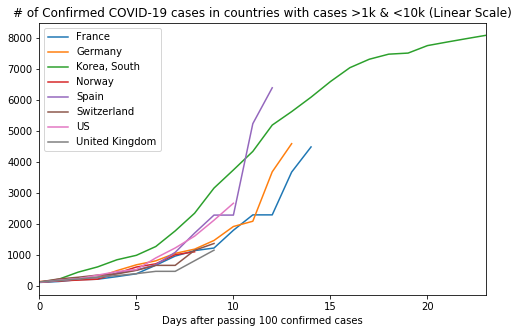

In [16]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for c in data.keys():
    data[c].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Dates')

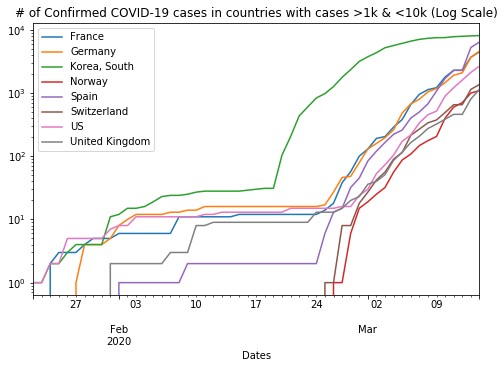

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

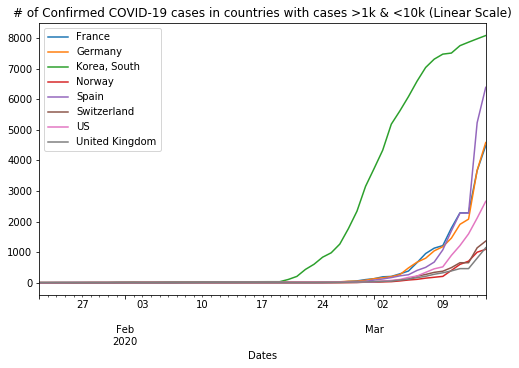

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Dates")